In [237]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [238]:
df = pd.read_csv('train.csv',',')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
mean_exam_points       10000 non-null float64
choose                 10000 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1015.7 KB


In [240]:
df.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


In [241]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


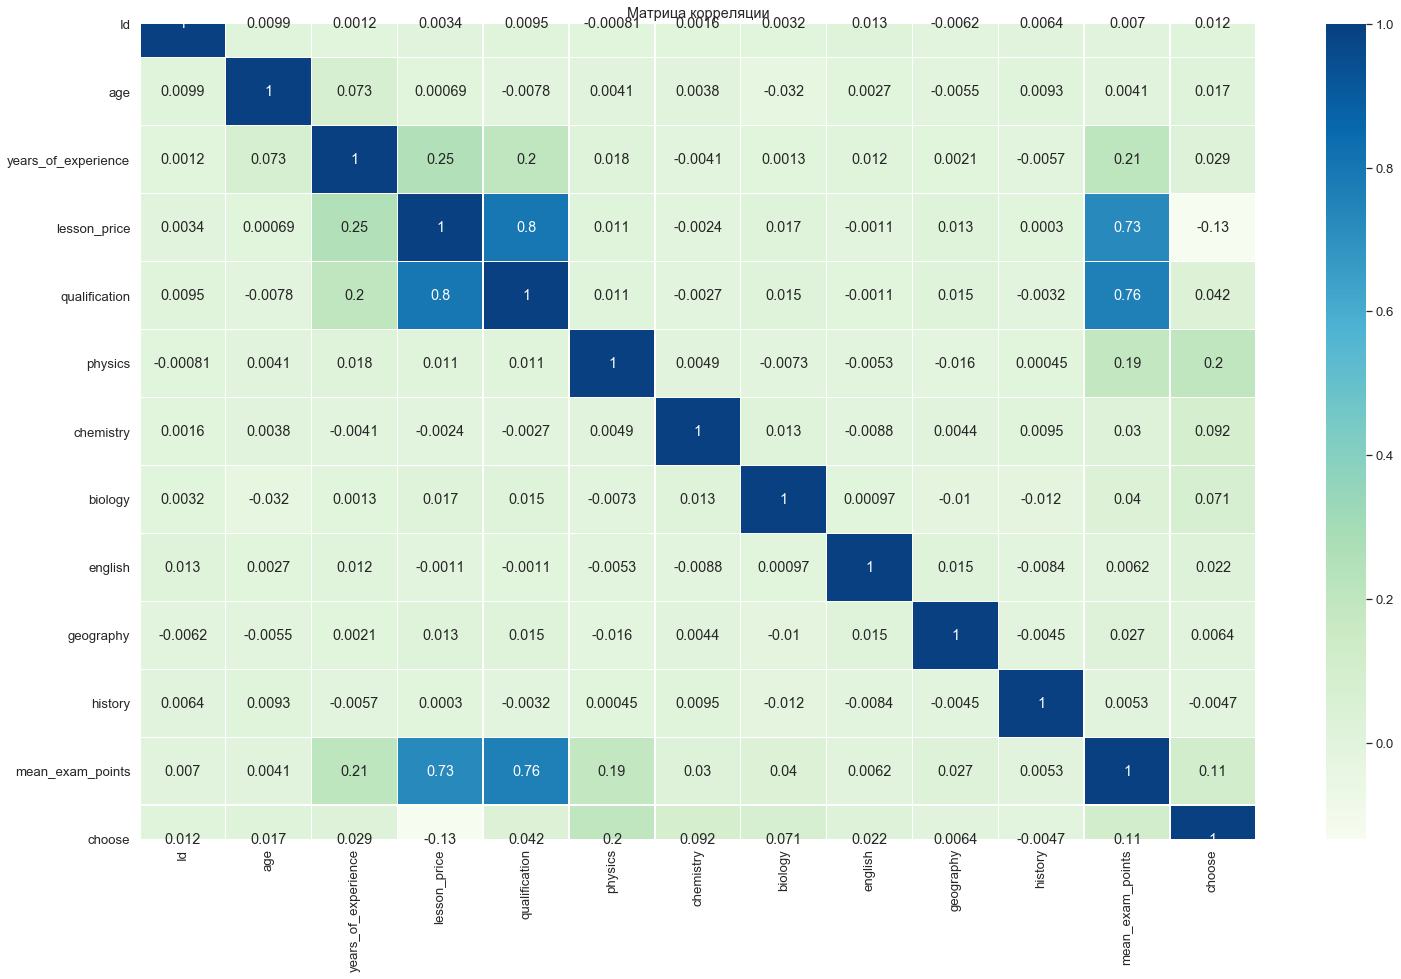

In [242]:
plt.figure(figsize = (25,15))

sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляции')
plt.show()

In [309]:
y = df['choose'].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [310]:
X = df.loc[:,['years_of_experience','lesson_price','qualification']].values
X

array([[0.00e+00, 2.15e+03, 2.00e+00],
       [2.00e+00, 1.25e+03, 2.00e+00],
       [3.00e+00, 1.75e+03, 1.00e+00],
       ...,
       [5.00e+00, 1.75e+03, 1.00e+00],
       [0.00e+00, 1.70e+03, 2.00e+00],
       [5.00e+00, 1.20e+03, 1.00e+00]])

In [311]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [312]:
X_st = X.copy()

In [313]:
#X_st[:, 0:3] = calc_std_feat(X[:, 0:3])
#X_st[:, -1] = calc_std_feat(X[:, -1])
X_st = calc_std_feat(X)

In [314]:
X_st = X_st.T
X_st

array([[-0.66376135, -0.66142709, -0.66025997, ..., -0.65792571,
        -0.66376135, -0.65792571],
       [ 1.84556554,  0.79514963,  1.37871402, ...,  1.37871402,
         1.32035758,  0.73679319],
       [-0.66142709, -0.66142709, -0.66259422, ..., -0.66259422,
        -0.66142709, -0.66259422]])

In [315]:
def calc_logloss(y, y_pred):
    for i in range(y_pred.shape[0]):
        if y_pred[i]==1:
            y_pred[i]-=1e-4
        elif y_pred[i]==0:
            y_pred[i]+=1e-4
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [316]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-0.9*z))
    return res

In [317]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [318]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [ 0.76699142 -0.6958114   0.91810914] 0.34367420905989615
1000 [ 0.82937642 -0.82336767  0.98056286] 0.33881877415209244
1500 [ 0.84846022 -0.86606641  0.99969853] 0.33831531127971576
2000 [ 0.8539942  -0.8824248   1.00527911] 0.3382509621394479
2500 [ 0.85484549 -0.88957335  1.00617529] 0.33824083809049216
3000 [ 0.85404994 -0.89334486  1.00542415] 0.3382379750490856
3500 [ 0.85269637 -0.89583179  1.00411496] 0.33823621130667864
4000 [ 0.85118091 -0.8978002   1.002644  ] 0.3382347090037629
4500 [ 0.84964749 -0.89953371  1.00115526] 0.3382333453073532
5000 [ 0.84814746 -0.90113873  0.99970009] 0.33823209506602847


In [320]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    return y_pred

In [342]:
def calc_pred(W, X):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    return (y_pred>y_pred.mean()).astype(np.int)

In [323]:
y_pred = calc_pred(W,X_st)
y_pred

[-2.88730681 -1.93875656 -2.46480592 ... -2.46282612 -2.41402158
 -1.8843664 ]


array([0, 1, 0, ..., 0, 0, 1])

In [328]:
#доля правильных ответов
a = np.sum(y_pred==y)/len(y)
a

0.4707

In [329]:
# матрица ошибок
TP = np.sum(np.logical_and(y == 1, y_pred == 1))
TN = np.sum(np.logical_and(y == 0, y_pred == 1))
FP = np.sum(np.logical_and(y == 0, y_pred == 0))
FN = np.sum(np.logical_and(y == 1, y_pred == 0))
print(f'TP={TP}, TN={TN}, FP={FP}, FN={FN}')

TP=742, TN=4926, FP=3965, FN=367


In [330]:
#(False Positive Rate) - отношение числа ложных срабатываний к общему размеру отрицательного класса
FPR = FP / (FP+TN)
FPR

0.44595658531098864

In [332]:
#(True Positive Rate) - отношение числа верных срабатываний к размеру положительного класса
TPR = TP / (TP+FN)
TPR

0.6690712353471596

In [333]:
df_kaggle = pd.read_csv('test.csv',',')
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


In [334]:
X_kaggle = df_kaggle.loc[:,['years_of_experience','lesson_price','qualification']].values
X_kaggle

array([[2.00e+00, 2.70e+03, 3.00e+00],
       [6.00e+00, 1.80e+03, 2.00e+00],
       [2.00e+00, 1.20e+03, 1.00e+00],
       ...,
       [2.00e+00, 1.25e+03, 1.00e+00],
       [5.00e+00, 1.00e+03, 2.00e+00],
       [0.00e+00, 1.50e+03, 1.00e+00]])

In [335]:
X_kaggle_st = X_kaggle.copy()

In [336]:
X_kaggle_st = calc_std_feat(X_kaggle)

In [337]:
X_kaggle_st = X_kaggle_st.T
X_kaggle_st

array([[-0.66090762, -0.65623578, -0.66090762, ..., -0.66090762,
        -0.65740374, -0.66324353],
       [ 2.49024256,  1.43908053,  0.73830584, ...,  0.79670373,
         0.50471428,  1.08869319],
       [-0.65973966, -0.66090762, -0.66207557, ..., -0.66207557,
        -0.66090762, -0.66207557]])

In [338]:
kaggle_prediction = calc_pred(W,X_kaggle_st)
kaggle_prediction

[-3.46414293 -2.51410532 -1.88774012 ... -1.94036472 -1.6731023
 -2.20546892]


array([0, 0, 1, ..., 1, 1, 1])

In [339]:
df_kaggle['choose'] = kaggle_prediction
df_kaggle.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,1
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,1


In [340]:
df_kaggle.drop("age", axis=1, inplace=True)
df_kaggle.drop("years_of_experience", axis=1, inplace=True)
df_kaggle.drop("lesson_price", axis=1, inplace=True)
df_kaggle.drop("qualification", axis=1, inplace=True)
df_kaggle.drop("physics", axis=1, inplace=True)
df_kaggle.drop("chemistry", axis=1, inplace=True)
df_kaggle.drop("biology", axis=1, inplace=True)
df_kaggle.drop("english", axis=1, inplace=True)
df_kaggle.drop("geography", axis=1, inplace=True)
df_kaggle.drop("history", axis=1, inplace=True)
df_kaggle.drop("mean_exam_points", axis=1, inplace=True)
df_kaggle.head()

,Id,choose
0,10000,0
1,10001,0
2,10002,1
3,10003,0
4,10004,1


In [341]:
df_kaggle.to_csv('sych_gulnara.csv',index=False)